<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Привет! Меня зовут Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.
    
Я буду поддерживать версионность комментариев, и при следующих итерациях комментарии будут выделены, как "Комментраии ревьюера - 2 (3 и.т.д.)"
    
Если у тебя есть замечания, возражения и вопросы, ты можешь писать свои комментарии, по возможности выделяй их так же цветом (например, синим), чтоб их можно было легко отделить от текста проекта. 
    
Кстати, предлагаю сразу общаться на "ты".
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.
    
</div>

# Принятие решений в бизнесе на основе данных

## Описание проекта

Подготовлен список гипотез для увеличения выручки.
Приоритизация гипотез, запуск A/B-тест и анализ результаты.

In [1]:
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Здесь можно было бы настроить отображение строк таблицы без обрезаний.

    pd.set_option('max_columns',None)
    
Еще фишки по настройки таблиц можно посмотреть здесь https://habr.com/ru/post/521894/
    
</div>

In [2]:
visitors = pd.read_csv('/datasets/visitors.csv')
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


## Приоритизация гипотез

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
hypothesis['ice'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']


In [6]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ice
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000


<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера**

ICE стоило отформатировать до 1-2 знаков после запятой
    
</div>

In [7]:
hypothesis['rice'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [8]:
hypothesis.style.format({'ice': '{:.1f}'})

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2


Порядок гипотез несколько изменился, на первое место встала гипотеза №7, где показатель reach - оценка количества пользователей, которых затронет изменение, на максимальном уровне, что более важно при постановке задач. 

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Отлично, что ты сделала сравнительную таблицу. Также можно было сделать сравнительную диаграмму для большей наглядности, только на диаграмме надо нормировать показатели или использовать две шкалы, т.к. параметры разнятся
    
    
А вот выводы стоило написать поподробнее. Так на какой показатель стоит ориентироваться? Важен ли в нашем случае охват? Можем мы на него полагаться? 
    
</div>

## Анализ А/В теста

**График кумулятивной выручки по группам**

In [9]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [10]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Посчитаем количество посещений и заказов в группах

In [11]:
print ('Количество посещений в группе А -', visitors.query('group == "A"')['visitors'].sum())
print ('Количество посещений в группе B -',visitors.query('group == "B"')['visitors'].sum())
print('-----------------------------------')
print ('Количество заказов в группе А -', orders.query('group == "A"').shape[0])
print ('Количество заказов в группе B -',orders.query('group == "B"').shape[0])

Количество посещений в группе А - 18736
Количество посещений в группе B - 18916
-----------------------------------
Количество заказов в группе А - 557
Количество заказов в группе B - 640


Посмотрим, есть ли такие, что попали в обе группы, уберем их

In [12]:
visitorsA = orders[orders['group']=='A']['visitorId']
visitorsB = orders[orders['group']=='B']['visitorId']

In [13]:
visitorsA = orders[orders['group']=='A']['visitorId']
visitorsB = orders[orders['group']=='B']['visitorId']

In [14]:
visitors_AB = orders.loc[orders['visitorId'].isin(visitorsA)& orders['visitorId'].isin(visitorsB),'visitorId'].unique()

In [15]:
orders = orders.loc[~orders['visitorId'].isin(visitors_AB)]
(orders.groupby('visitorId')['group'].nunique()>1).count()

973

In [16]:
print ('Количество заказов в группе А -', orders.query('group == "A"').shape[0])
print ('Количество заказов в группе B -',orders.query('group == "B"').shape[0])

Количество заказов в группе А - 468
Количество заказов в группе B - 548


Готовим таблицу для графика кумулятивной выручки

In [17]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

In [18]:
# Соберём агрегированные кумулятивные по дням данные о заказах с помощью np.logical_and()
orders_aggregated = (dates_groups
                     .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date']
                                                            , orders['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'revenue':'sum', 'transactionId':'nunique'}), axis=1) 
                    .sort_values(by=['date','group']))

In [19]:
# переименуем немножк
orders_aggregated.rename(columns={'transactionId':'orders'}, inplace=True)

In [20]:
orders_aggregated.head()

,date,group,revenue,orders
55,2019-08-01,A,142779,23
66,2019-08-01,B,59758,17
175,2019-08-02,A,234381,42
173,2019-08-02,B,221801,40
291,2019-08-03,A,346854,66


In [21]:
# повторим с посещениями
visitors_aggregated = (dates_groups
                     .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date']
                                                            , visitors['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1) 
                    .sort_values(by=['date','group']))
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [22]:
# объединяем кумулятивные данные в одной таблице
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date','group'])
cumulative_data.head()

,date,group,revenue,orders,visitors
0,2019-08-01,A,142779,23,719
1,2019-08-01,B,59758,17,713
2,2019-08-02,A,234381,42,1338
3,2019-08-02,B,221801,40,1294
4,2019-08-03,A,346854,66,1845


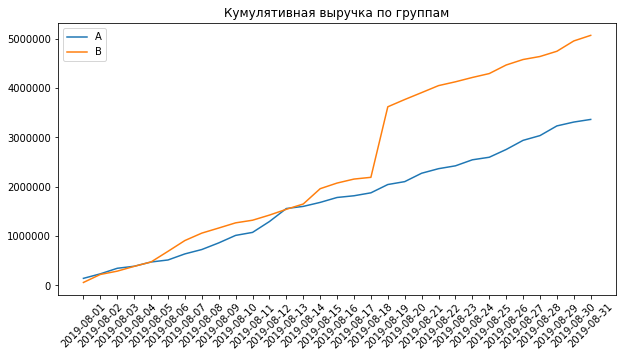

In [23]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и В
cumulative_a = cumulative_data.loc[cumulative_data['group'] == 'A',['date','revenue','orders','visitors']]
cumulative_b = cumulative_data.loc[cumulative_data['group'] == 'B',['date','revenue','orders','visitors']]

#график

plt.figure(figsize=(10, 5))
plt.plot(cumulative_a['date'], cumulative_a['revenue'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['revenue'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивная выручка по группам')
plt.legend();

Обе группы растут в выручке, в группе В всплеск выручки 17 августа. Возможно, выброс в виде крупной покупки

**График кумулятивного чека**

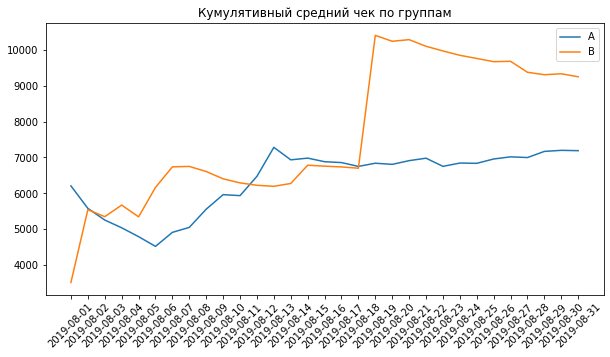

In [24]:

plt.figure(figsize=(10, 5))
plt.plot(cumulative_a['date'], cumulative_a['revenue'] / cumulative_a['orders'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['revenue'] / cumulative_b['orders'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек по группам')
plt.legend();

18.08 в группе В крупная покупка, после которой средний чек начинает снижаться.

**Относительное изменение кумулятивного среднего чека**

In [25]:
#таблица для графика изменения среднего чека с маркерами групп а и б
merged_cumulative = cumulative_a.merge(cumulative_b, on=['date'],suffixes=('_a', '_b'))

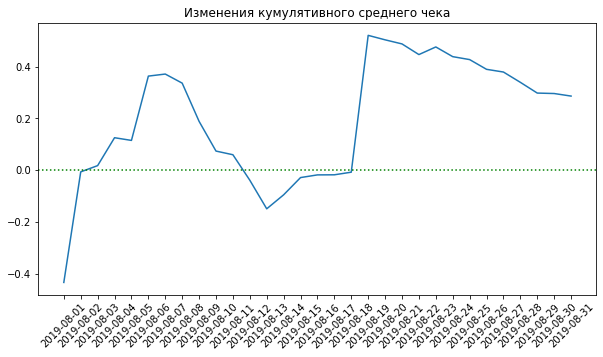

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(
    merged_cumulative['date'],
    (merged_cumulative['revenue_b'] / merged_cumulative['orders_b']) / (merged_cumulative['revenue_a'] / merged_cumulative['orders_a']) -1
)
plt.xticks(rotation=45)
plt.title('Изменения кумулятивного среднего чека')
plt.axhline(y=0, color='green', linestyle='dotted');

Крупные заказы присутствуют и до 18.08. Пока рано делать выводы относительно групп, график скачет, а значит, эти аномалии нужно в дальнейшем учесть


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

В этой части графики построены верно, предположение о больших заказах правильное. Надо только не забыть отметить когда мы подтвердим это предположение
    
</div>


**Кумулятивная конверсия по группам**

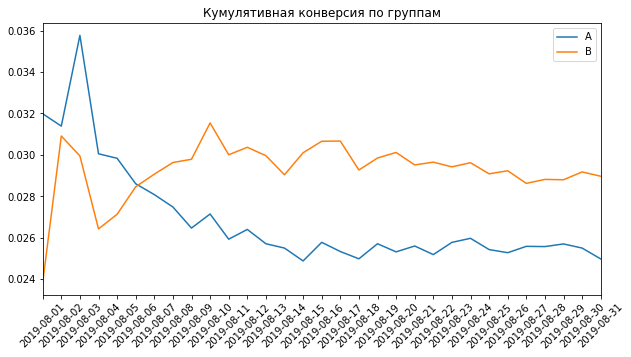

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_a['date'], cumulative_a['orders'] / cumulative_a['visitors'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['orders'] / cumulative_b['visitors'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивная конверсия по группам')
plt.axis(xmin=cumulative_a['date'].min(), xmax=cumulative_a['date'].max())
plt.legend();

До 5.08 группа А была впереди, конверсия колебалась, но после - группы зафиксировались: конверсия группы В стала стабильно выше конверсии группы А. 

**Относительное изменение кумулятивной конверсии**

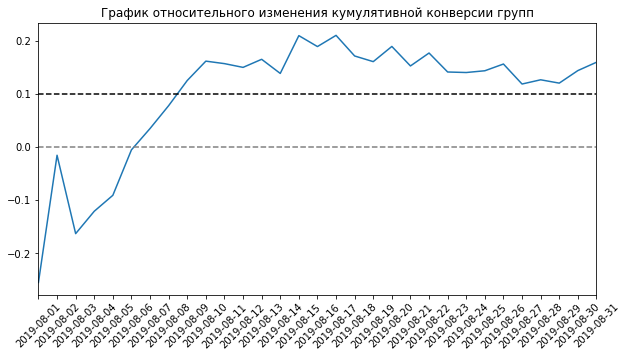

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(
    merged_cumulative['date'],
    (merged_cumulative['orders_b'] / merged_cumulative['visitors_b']) / (merged_cumulative['orders_a'] / merged_cumulative['visitors_a']) -1
)
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивной конверсии групп')
plt.axis(xmin=merged_cumulative['date'].min(), xmax=merged_cumulative['date'].max())
plt.axhline(y=0, color='grey', linestyle='--')
plt.axhline(y=0.1, color='black', linestyle='--');

Как и было определено ранее, группа А сначала вырывалась вперед, затем группа В зафиксировалась стабильно выше группы А. Далее - анализ аномалий


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Отлично, здесь тоже все правильно построено и оформлено, молодец
    
</div>


**Количество заказов по пользователям**

посмотрим на дорогие заказы

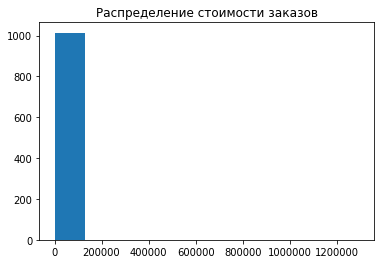

In [29]:
plt.hist(orders['revenue'])
plt.title('Распределение стоимости заказов');

очевидно, есть крупные заказы более 200 000, посмотрим подробнее

In [30]:
bigorders = orders.query('revenue > 200000')

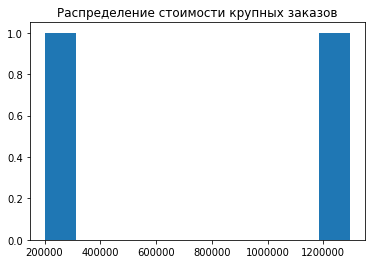

In [31]:
plt.hist(bigorders['revenue'])
plt.title('Распределение стоимости крупных заказов');

итого, целых два крупных заказа


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Отлично, здесь стоило подчеркнуть, что наши предположения оправдались и что именно эти заказы внесли шум на графиках выше
    
</div>


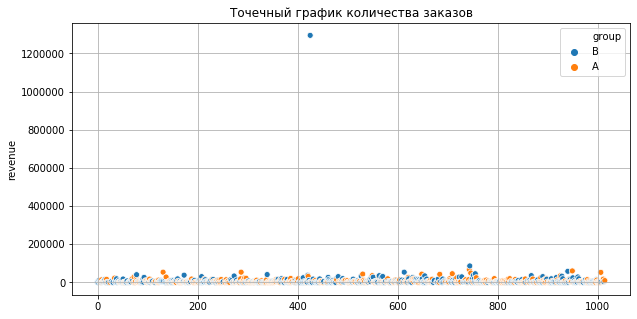

In [32]:
#построим точечный график с нагрядным отображением групп
x_values = pd.Series(range(0,orders['revenue'].count()))

plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_values, y="revenue", hue="group",
                     data=orders)
plt.grid()
plt.title('Точечный график количества заказов');

Самый крупный заказ принадлежит группе В, что, возможно, определяет ее лидерство

Посмотрим на заказы на пользователя

In [33]:
ordersByUsers = (
   orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']



построим точечный график, чтобы увидеть выбросы

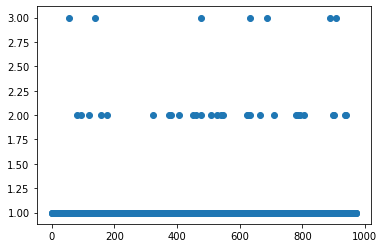

In [34]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

Достаточно пользователей с 2-3 заказами, нужно посчитать перцентили

**95 и 99 перцентели количества заказов на пользователя**

In [35]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


*не более 1% пользователей заказывали 2 и более раз, границей определения аномальных пользователей будет 99 перцентиль. избавимся от таких*

In [36]:
per99 = np.percentile(ordersByUsers['orders'], [99])[0]
ordersByUsersClean = ordersByUsers.query('orders<= @per99')

**Стоимость заказов**

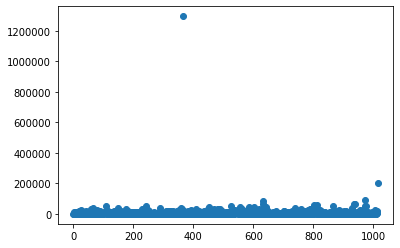

In [37]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

Мы построили график на данных с "аномалиями" - крупными покупками. В основном, стоимость всех заказов лежит в диапазоне до 200 000

**95 и 99 перцентили стоимости заказов**

In [38]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


*Также определим 99 перцентиль в качестве границы**

In [39]:
per_99 = np.percentile(orders['revenue'], [99])[0]
orders_clean = orders.query('revenue<= @per_99')

In [40]:
#итоговая таблица без аномалий
orders_clean = orders_clean.loc[orders_clean['visitorId'].isin(ordersByUsersClean['visitorId'])]



<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Отлично, все верно. 99% - правильный выбор для отсечения выбросов.
    
</div>


**Статистическая значимость различий в конверсии между группами по сырым данным**

In [41]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null object
revenue          1016 non-null int64
group            1016 non-null object
dtypes: int64(3), object(2)
memory usage: 87.6+ KB


In [42]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


подготовим данные для анализа по сырым данным: приведем столбец с датой в нужный тип, посчитаем для каждой из групп заказы и визиты

In [43]:
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [44]:


visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Посчитаем статистическую значимость различия в конверсии между группами.
Создадим переменные ordersByUsersA и ordersByUsersB (в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов)

In [45]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']


<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Все верно, но нужно было сформулировать HO и Ha, а также поподробнее рассказать почему мы выбрали именно критерий манна-Уитни
    
</div>


<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента**

fixed
    
</div>


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Да, отлично, теперь все правильно
    
</div>

**Строим гипотезы для анализа средних конверсий:
Н0 - конверсии группы А и В равны
Н1 - конверсии группы А и В не равны**

**Мы используем критерий Манна-Уитни, т.к. в наших данных есть выбросы и судить о нормальном распределении не приходится. Для того, чтобы выбивающиеся значения не так существенно влияли на результат, используются непараметрические тесты**

Посчитаем кол-во заказов для пользователй разных групп. Далее тем, кто ничего не заказал, будут соответствовать нули. 
Список индексов функцией np.arange(), сцепляем списки pd.concat()

In [46]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

применим критерий манна-уитни.
alpha = 0.05
Выведем также относительный прирост конверсии группы B

In [47]:


print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))

print('Относительный прирост конверсии группы В', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


0.017
Относительный прирост конверсии группы В 0.138


Так как p_value меньше заданного значения alpha, то мы отвергаем гипотезу о равенстве средний конверсий.

**Статистическая значимость различий в среднем чеке между группами по сырым данным**

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.

**Строим гипотезы для анализа средних чеков:
Н0 - средние чеки группы А и В равны
Н1 - средние чеки группы А и В не равны**

In [48]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative='two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
Теперь подготовим очищенные данные

**Статистическая значимость различий в конверсии между группами по очищенным данным**

*ранее мы изучили аномальных пользователей на основании 99 перцентиля и определили границы сумм (200 000) и количества заказов (2), подготовим данные*

In [49]:
limit_orders = 2
limit_revenue = 200000

In [50]:
#кол-во аномальных пользователей
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders']>limit_orders]['visitorId'], 
                                ordersByUsersB[ordersByUsersB['orders']>limit_orders]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue']>limit_revenue]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Кол-во аномальных пользователей: {}'.format(len(abnormalUsers)))

Кол-во аномальных пользователей: 22


22 аномальных пользователей. посмотрим на разницу без их учета, отфильтруем с помощью np.logical

In [51]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [52]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.014
0.166


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий студента**

Конверсия изменилась: стала меньше, прирост конверсии также уменьшился
</div>

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Посмотри, судя по результатам ты провела проверку на тех же данных без фильтрации
    
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента**

Действительно, была ошибка еще на подсчете количества аномальных пользователей:(
    исправила
</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Ок, поправлено, молодец
    
</div>

**Статистическая значимость различий в среднем чеке между группами по очищенным данным**

In [53]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.296
-0.100


P-value сильно уменьшился, но все еще значительно больше alpha. Относительные различия в среднем чеке между группами сильно изменились: крупная покупка была в группе В и это отразилось на результатах

## Выводы

1) Выявлена стат значимость в конверсих двух групп, конверсия в группе В выше. 

2) В среднем чеке групп не было найдено стат значимых различий. 

3) Т.к. конверсия группы В больше, чем у группы А, а также больший размер куммулитивной выручки (после результатов проерки по очищенным данным), принимаем решение остановить тест и зафиксировать победу группы В.

4) Можно сделать замечание, что одни и те же пользователи попадали в обе группы.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Общий комментарий по проекту</h1>
    
Ты отлично поработала над проектом, графики верно построены и гипотезы проверены правильно. 
    
Постарайся доработать проверку гипотез. Даже при отбрасывании 1% шумов результаты проверки гипотез должны достаточно сильно измениться.
    
Ты хорошо справляешься с программой. Удачи.
</div>

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента**

Спасибо огромное за ревью и полезные ссылки! Я по зеленым комментариям прошлась, усвоила, но за неимением времени переделывать не стала, прошу меня понять и простить:) 
</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

Проект отлично доработан, молодец. Зеленые комменты не обязательны для исправления это скорее доп. материал.
    
</div>